# IML Capstone Project - Classification
## Pre Clustering

In [11]:
# Numerical/scientific computing packages.
import numpy as np
import scipy

# Machine learning package.
import sklearn
from sklearn import datasets
from sklearn import metrics, model_selection, tree
import pandas as pd

from sklearn import cluster
from scipy.cluster import vq
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import squareform 

# For computing gradients.
import autograd.numpy as np
from autograd import grad, elementwise_grad

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt

import time
import math

In [12]:
# initializing seed
import random
random.seed(11993511)

In [50]:
# Load data:
file = pd.read_csv('musicData.csv')
df = pd.DataFrame(file)
df['mode'] = df['mode'].apply({'Major':1, 'Minor':0}.get)
df['key'] = df['key'].apply({'A':1, 'A#':2, 'B':3, 'C':4, 'C#':5, 'D':6, 'D#':7, 'E':8, 'F':9, 'F#':10, 'G':11, 'G#':12}.get)
# df['music_genre'] = df['music_genre'].apply({'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5, 'Blues':6, 'Rock':7, 'Classical':8, 'Hip-Hop':9}.get)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,2.0,0.115,-5.201,0.0,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,6.0,0.124,-7.043,0.0,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,12.0,0.534,-4.617,1.0,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,5.0,0.157,-4.498,1.0,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,10.0,0.157,-6.266,1.0,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,5.0,0.119,-7.022,1.0,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,3.0,0.109,-9.814,1.0,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,6.0,0.143,-5.443,1.0,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,11.0,0.106,-5.016,0.0,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [51]:
df = df.dropna()
y = df['music_genre'].to_numpy()
numeric_cols = df.select_dtypes(exclude='number')
df.drop(numeric_cols, axis=1, inplace=True)
# for i in df:
#     df[i] =pd.to_numeric(df[i], errors ='coerce').fillna('NaN').astype('float')
df

C:\Users\zhuho\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,2.0,0.115,-5.201,0.0,0.0748,0.759
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,6.0,0.124,-7.043,0.0,0.0300,0.531
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,12.0,0.534,-4.617,1.0,0.0345,0.333
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,5.0,0.157,-4.498,1.0,0.2390,0.270
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,10.0,0.157,-6.266,1.0,0.0413,0.323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,59.0,0.03340,0.913,-1.0,0.574,0.00000,5.0,0.119,-7.022,1.0,0.2980,0.330
50001,43557.0,72.0,0.15700,0.709,251860.0,0.362,0.00000,3.0,0.109,-9.814,1.0,0.0550,0.113
50002,39767.0,51.0,0.00597,0.693,189483.0,0.763,0.00000,6.0,0.143,-5.443,1.0,0.1460,0.395
50003,57944.0,65.0,0.08310,0.782,262773.0,0.472,0.00000,11.0,0.106,-5.016,0.0,0.0441,0.354


In [55]:
# standardizing data for dimensionality reduction
from sklearn.preprocessing import StandardScaler
df1 = df.drop(['instance_id'], axis = 1)
numeric = ['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','valence']
categorical = ['key','mode']

scaler = StandardScaler()
X_numeric_std = pd.DataFrame((scaler.fit_transform(df1[numeric])))
X_categorical_std = pd.DataFrame(df1[categorical])
X_std = pd.concat([X_numeric_std, X_categorical_std], axis=1)
X = np.array(X_std.dropna())

(49995, 12)


In [62]:
# unsupervised learning for prediction
# dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=300)
X_embedded = tsne.fit_transform(X)

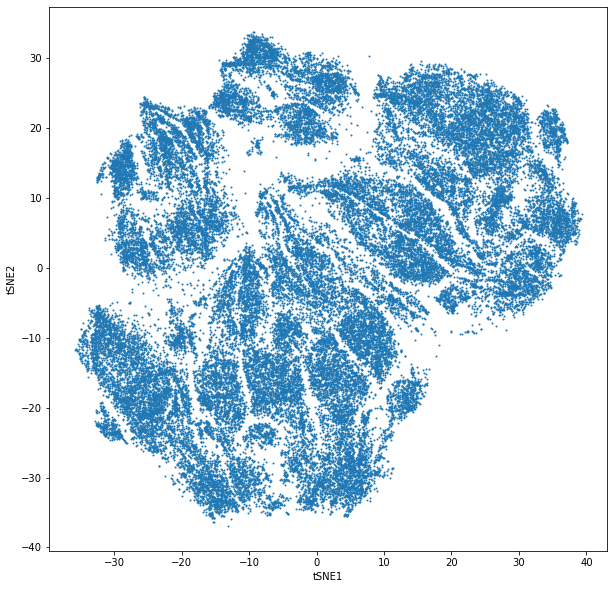

In [63]:
# plotting - after dimensionality reduction
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=1)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

For n_clusters = 8 The average silhouette_score is : 0.40809482
For n_clusters = 9 The average silhouette_score is : 0.40595207
For n_clusters = 10 The average silhouette_score is : 0.41391116
For n_clusters = 11 The average silhouette_score is : 0.4220457
For n_clusters = 12 The average silhouette_score is : 0.4127515


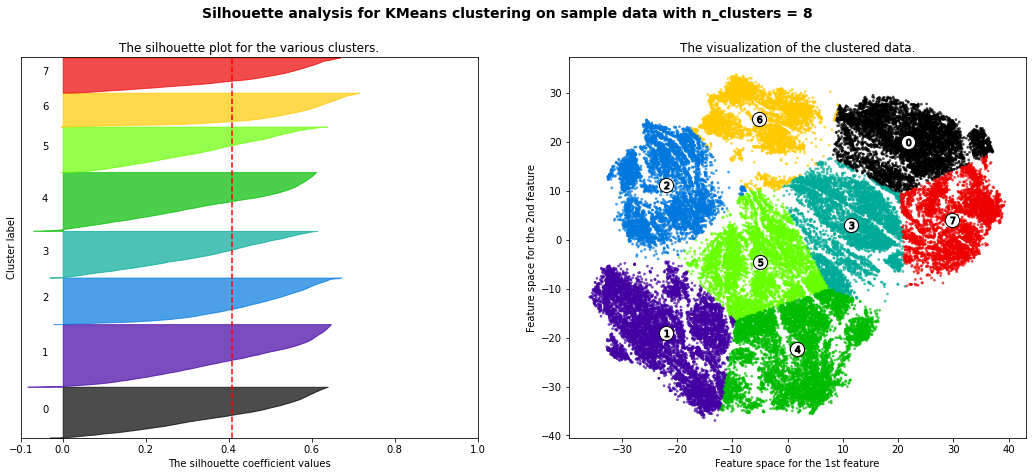

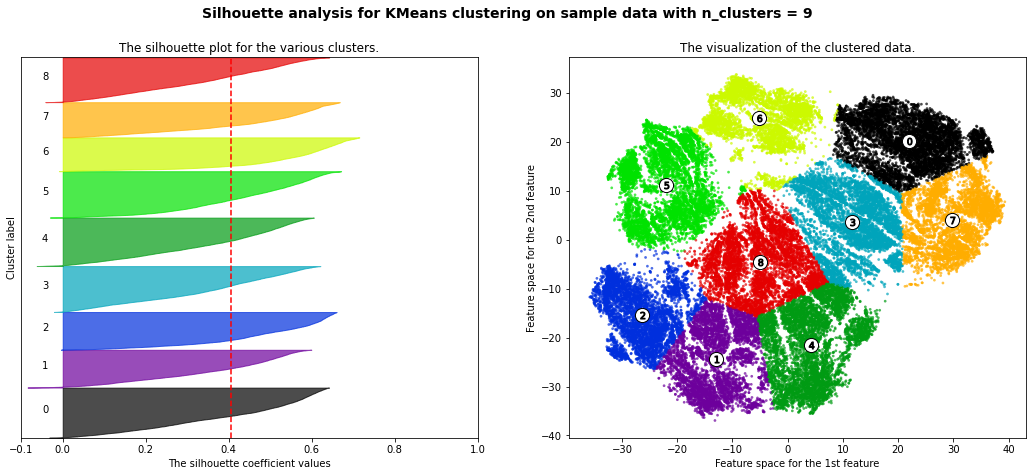

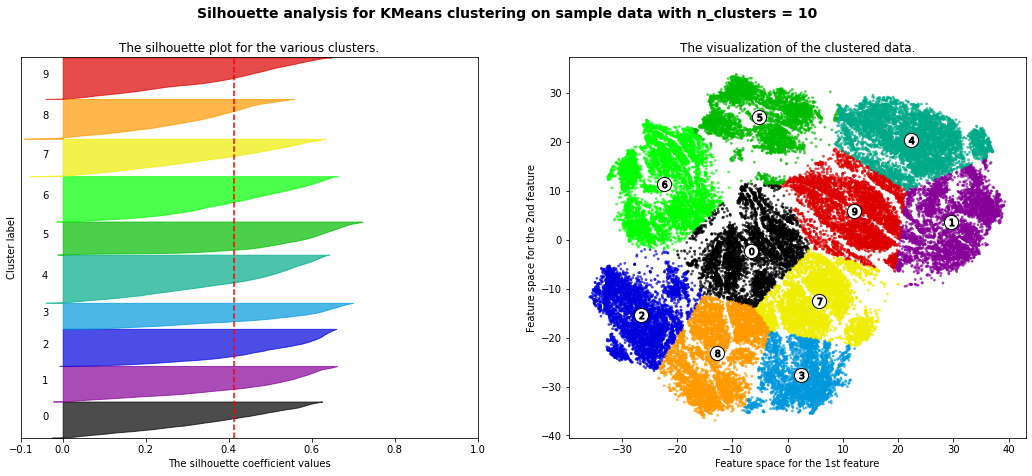

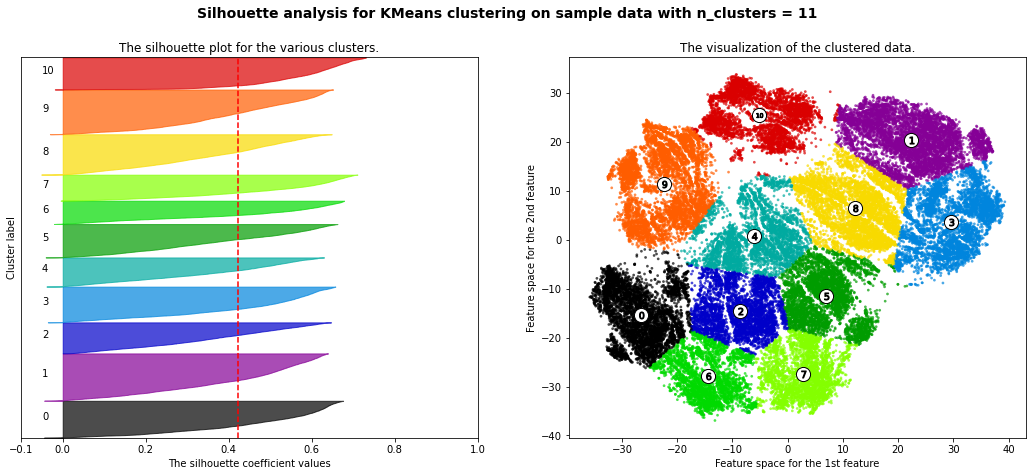

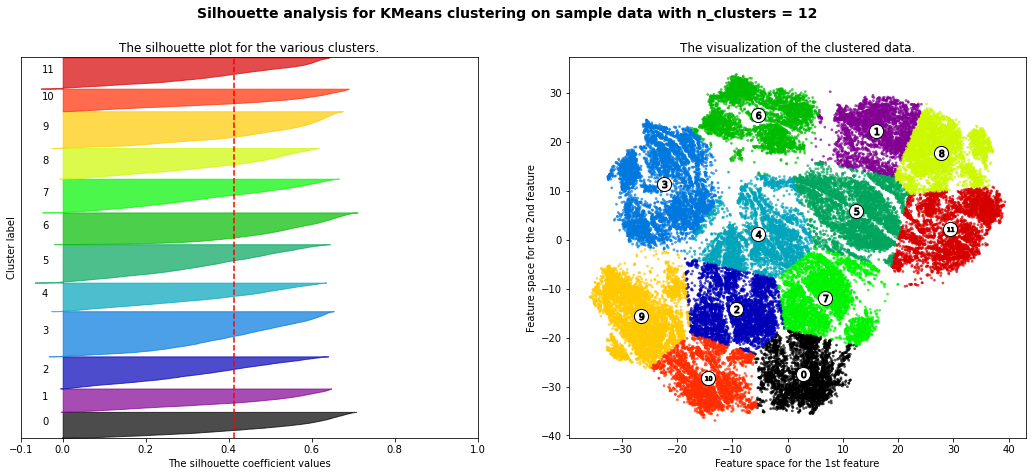

In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch

range_n_clusters = [8, 9, 10, 11, 12]
X = X_embedded

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [67]:
# clustering using DBSCAN
## DBSCAN Algorithm
def region_query (p, eps, X):
    # These lines check that the inputs `p` and `X` have
    # the right shape.
    _, dim = X.shape
    assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))
    
    return np.linalg.norm (p - X, axis=1) <= eps

def index_set (y):
    """
    Given a boolean vector, this function returns
    the indices of all True elements.
    """
    assert len (y.shape) == 1
    return set (np.where (y)[0])

def find_neighbors (eps, X):
    m, d = X.shape
    neighbors = [] # Empty list to start
    for i in range (len (X)):
        n_i = index_set (region_query (X[i, :], eps, X))
        neighbors.append (n_i)
    assert len (neighbors) == m
    return neighbors

def find_core_points (s, neighbors):
    assert type (neighbors) is list
    assert all ([type (n) is set for n in neighbors])
    
    core_set = set ()
    for i, n_i in enumerate (neighbors):
        if len (n_i) >= s:
            core_set.add (i)
    return core_set

def expand_cluster (p, neighbors, core_set, visited, assignment):
    # Assume the caller performs Steps 1 and 2 of the procedure.
    # That means 'p' must be a core point that is part of a cluster.
    assert (p in core_set) and (p in visited) and (p in assignment)
    
    reachable = set (neighbors[p])  # Step 3
    while reachable:
        q = reachable.pop () # Step 4
        
        if q not in visited:
            visited.add (q) # Mark q as visited
            if q in core_set:
                reachable |= neighbors[q]
        if q not in assignment:
            assignment[q] = assignment[p]
    
def dbscan (eps, s, X):
    clusters = []
    point_to_cluster = {}
    
    neighbors = find_neighbors (eps, X)
    core_set = find_core_points (s, neighbors)
    
    assignment = {}
    next_cluster_id = 0

    visited = set ()
    for i in core_set: # for each core point i
        if i not in visited:
            visited.add (i) # Mark i as visited
            assignment[i] = next_cluster_id
            expand_cluster (i, neighbors, core_set,
                            visited, assignment)
            next_cluster_id += 1

    return assignment, core_set

Number of core points: 40226
Number of clusters: 17
Number of unclassified points: 1685


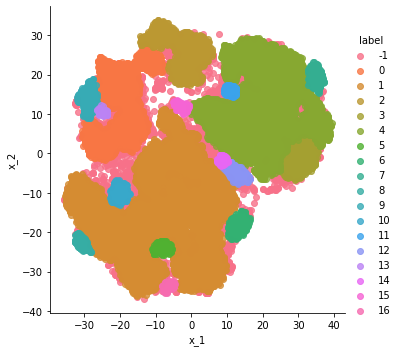

In [84]:
import seaborn as sns
## Visualization
def fn(fn_base, dirname='./misc/'): 
    return '{}{}'.format(dirname, fn_base)

crater = pd.DataFrame(X_embedded, columns = ['x_1', 'x_2']) # based on t-SNE dimension reduction

def make_scatter_plot2 (df, x="x_1", y="x_2", hue="label", size=1):
    if (hue is not None) and (hue in df.columns):
        sns.lmplot (x=x, y=y, hue=hue, data=df,
                    fit_reg=False)
    else:
        sns.lmplot (x=x, y=y, data=df, fit_reg=False)

# make_scatter_plot (crater, hue='kmeans_label')
X_db = crater[['x_1', 'x_2']].values
assignment, core_set = dbscan(1.3, 70, X_db)

print ("Number of core points:", len(core_set))
print ("Number of clusters:", max(assignment.values())+1)
print ("Number of unclassified points:", len(X_db) - len(assignment))

def plot_labels (df, labels):
    df_labeled = df.copy()
    df_labeled['label'] = labels
    make_scatter_plot2(df_labeled)

labels = [-1] * len (X)
for i, c in assignment.items ():
    labels[i] = c

plot_labels (crater, labels)